In [26]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from jax_sph.io_state import read_h5
import warnings

# Disable UserWarnings
warnings.filterwarnings("ignore")

In [27]:
# Load data
optim_init_a = read_h5("optim_a_init.h5")
optim_final_a = read_h5("optim_a_final.h5")
target_init_a = read_h5("target_traj/traj_000_a.h5")
target_final_a = read_h5("target_traj/traj_100_a.h5")

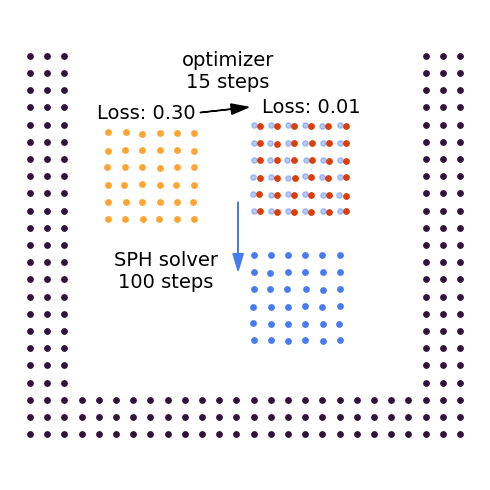

done


In [34]:
def ploting_A(
    optim_final_state, optim_init_state, target_state_final, target_state_init, mask
):
    # Add two plots side by side
    fig = plt.figure(figsize=(5, 5))
    turbo_map = cm.get_cmap("turbo")
    global_size = 15
    plt.scatter(
        target_state_init["r"][mask][:, 0],
        target_state_init["r"][mask][:, 1],
        label="target 0",
        s=global_size,
        c=turbo_map(0.15),
        alpha=0.4,
    )
    plt.scatter(
        target_state_final["r"][mask][:, 0],
        target_state_final["r"][mask][:, 1],
        label="target 100",
        s=global_size,
        c=turbo_map(0.15),
    )
    plt.scatter(
        optim_init_state["r"][mask][:, 0],
        optim_init_state["r"][mask][:, 1],
        label="init",
        s=global_size,
        c=turbo_map(0.7),
    )
    plt.scatter(
        optim_final_state["r"][mask][:, 0],
        optim_final_state["r"][mask][:, 1],
        label="updated",
        s=global_size,
        c=turbo_map(0.85),
    )
    wall = optim_init_state["r"][~mask]
    top_lid = wall[:, 1] < 1.17
    plt.scatter(
        wall[top_lid][:, 0],
        wall[top_lid][:, 1],
        label="wall",
        s=global_size,
        color=turbo_map(0),
    )
    # plt.legend(loc='upper right')
    plt.arrow(0.52, 0.96, 0.09, 0.01, head_width=0.03, head_length=0.05, fc="k", ec="k")
    plt.text(0.6, 1.03, "optimizer\n15 steps", fontsize=14, ha="center", rotation=0)
    plt.text(0.22, 0.94, "Loss: 0.30", fontsize=14)
    plt.text(0.7, 0.96, "Loss: 0.01", fontsize=14)

    plt.arrow(
        0.63,
        0.7,
        0.0,
        -0.15,
        head_width=0.03,
        head_length=0.05,
        fc=turbo_map(0.15),
        ec=turbo_map(0.15),
    )
    plt.text(0.42, 0.45, "SPH solver\n100 steps", fontsize=14, ha="center", rotation=0)

    plt.axis("equal")
    plt.axis("off")

    plt.tight_layout()
    plt.show()
    fig.savefig("optim_A.pdf", bbox_inches="tight")
    print("done")


mask = target_final_a["tag"] == 0

ploting_A(optim_final_a, optim_init_a, target_final_a, target_init_a, mask)

In [29]:
optim_init_b = read_h5("optim_b_init.h5")
optim_final_b = read_h5("optim_b_final.h5")
target_init_b = read_h5("target_traj/traj_000_b.h5")
target_final_b = read_h5("target_traj/traj_100_b.h5")

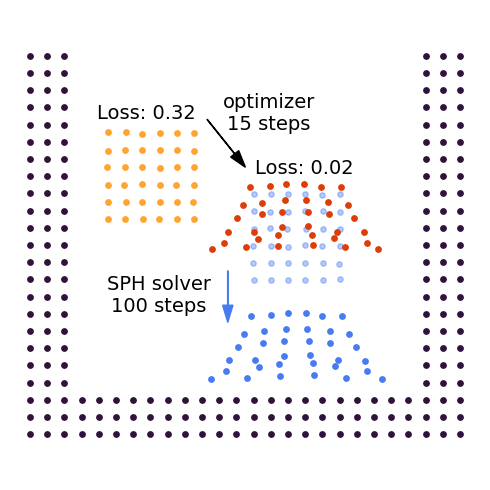

done


In [43]:
def ploting_B(
    optim_final_state, optim_init_state, target_state_final, target_state_init, mask
):
    # Add two plots side by side
    fig = plt.figure(figsize=(5, 5))
    turbo_map = cm.get_cmap("turbo")
    global_size = 15
    plt.scatter(
        target_state_init["r"][mask][:, 0],
        target_state_init["r"][mask][:, 1],
        label="target 0",
        s=global_size,
        c=turbo_map(0.15),
        alpha=0.4,
    )
    plt.scatter(
        target_state_final["r"][mask][:, 0],
        target_state_final["r"][mask][:, 1],
        label="target 100",
        s=global_size,
        c=turbo_map(0.15),
    )
    plt.scatter(
        optim_init_state["r"][mask][:, 0],
        optim_init_state["r"][mask][:, 1],
        label="init",
        s=global_size,
        c=turbo_map(0.7),
    )
    plt.scatter(
        optim_final_state["r"][mask][:, 0],
        optim_final_state["r"][mask][:, 1],
        label="updated",
        s=global_size,
        c=turbo_map(0.85),
    )
    wall = optim_init_state["r"][~mask]
    top_lid = wall[:, 1] < 1.17
    plt.scatter(
        wall[top_lid][:, 0],
        wall[top_lid][:, 1],
        label="wall",
        s=global_size,
        color=turbo_map(0),
    )
    # plt.legend(loc='upper right')
    line = plt.arrow(
        0.54, 0.94, 0.08, -0.1, head_width=0.03, head_length=0.05, fc="k", ec="k"
    )
    plt.text(0.72, 0.91, "optimizer\n15 steps", fontsize=14, ha="center", rotation=0)
    plt.text(0.22, 0.94, "Loss: 0.32", fontsize=14)
    plt.arrow(
        0.6,
        0.5,
        0.0,
        -0.10,
        head_width=0.03,
        head_length=0.05,
        fc=turbo_map(0.15),
        ec=turbo_map(0.15),
    )
    plt.text(0.40, 0.38, "SPH solver\n100 steps", fontsize=14, ha="center", rotation=0)
    plt.text(0.68, 0.78, "Loss: 0.02", fontsize=14)
    plt.axis("equal")
    plt.axis("off")

    plt.tight_layout()
    plt.show()
    fig.savefig("optim_B.pdf", bbox_inches="tight")
    print("done")


mask = target_final_b["tag"] == 0

ploting_B(optim_final_b, optim_init_b, target_final_b, target_init_b, mask)